In [1]:
import sys, os
p = os.path.abspath('..')
# p = p+r'\config'
sys.path.insert(1, p)

In [2]:
import pandas as pd
import re
import numpy as np
import pickle
import matplotlib.pyplot as plt


In [3]:
# 파일 불러오기
with open('../../data/ann_qid.pkl', 'rb') as f:
    qdf = pickle.load(f)


In [4]:
path = f'./result/'
file_list = os.listdir(path)

In [5]:
def make_one_file(ver):
    path = f'./result/{ver}'
    file_list = os.listdir(path)

    if len(file_list)>0 : 
        df = pd.DataFrame()
        for f in file_list:
            tmp = pd.read_csv(f'{path}/{f}', index_col =0)
            df = pd.concat([df, tmp], axis =0)

        df.sort_values(by = ['creationdate']).reset_index(drop=True)
        
        return df
        



In [6]:
def pp_date(df):
    df = df.sort_values(by = ['creationdate'])
    df_date = df[['creationdate']].drop_duplicates().reset_index(drop=True)
    return df_date
        

In [7]:
def pp_df(df, sc_num):
    df_c = df.copy()
    df_c = df_c[~df_c['result'].isna()]
    df_c['o_result'] = df_c['result'].apply(lambda x : re.sub(r'[^0-9]', '', x))
    df_c = df_c[df_c['o_result'].isin(['1', '0', '2'])]
    
    df_c.loc[:, 'cnt'] = 1
    chk_cnt = df_c.groupby(['id', 'o_result']).count().reset_index()[['id', 'o_result', 'cnt']]
    chk_cnt = chk_cnt[chk_cnt['cnt'] == sc_num]


    m_chk_cnt = pd.merge(chk_cnt, df, on = 'id')
        
    return m_chk_cnt
        



In [8]:
def calc_rate(df):
    df_c = df.copy()
    df_c = df_c[['ver', 'creationdate', 'id', 'o_result']].drop_duplicates()
    df_c.loc[:, 'r_cnt'] = 1
    df_c = df_c.groupby(['creationdate', 'o_result']).count().reset_index()[['creationdate'	,'o_result',	'r_cnt']]
    tot_df = df_c.groupby(['creationdate']).sum().reset_index()[['creationdate', 'r_cnt']].rename(columns = {'r_cnt':'tot_cnt'})

    return_df = pd.merge(df_c, tot_df, on = 'creationdate' )

    return_df['rate'] = return_df['r_cnt']/return_df['tot_cnt']*100
    return_df = return_df.sort_values(by = ['creationdate'])

    return return_df
        



In [9]:
sample_list = [       13
                    , 38
                    , 63
                    , 88
                    , 113
                    , 138
                    , 163
                    , 188]

In [10]:
tot_df = pd.DataFrame()
for listid in sample_list:
    df = make_one_file(listid)
    df = pp_df(df, 5)
    tot_df = pd.concat([tot_df, df], axis = 0)

tot_calc = calc_rate(tot_df)

    

In [11]:
df_date = pp_date(tot_df)

In [12]:
df_date.head()

,creationdate
0,2021-12-01
1,2021-12-15
2,2022-01-01
3,2022-01-15
4,2022-02-01


In [13]:
tot_calc.head()

,creationdate,o_result,r_cnt,tot_cnt,rate
0,2021-12-01,0,28,78,35.897436
1,2021-12-01,1,39,78,50.000000
2,2021-12-01,2,11,78,14.102564
3,2021-12-15,0,17,84,20.238095
4,2021-12-15,1,50,84,59.523810


In [14]:
tot_calc[tot_calc['creationdate'] =='2021-12-01']

,creationdate,o_result,r_cnt,tot_cnt,rate
0,2021-12-01,0,28,78,35.897436
1,2021-12-01,1,39,78,50.000000
2,2021-12-01,2,11,78,14.102564


In [15]:
m_chk_cnt_0 = tot_calc[tot_calc['o_result'] =='0']
m_chk_cnt_1 = tot_calc[tot_calc['o_result'] =='1']
m_chk_cnt_2 = tot_calc[tot_calc['o_result'] =='2']

In [16]:
m_chk_cnt_0

,creationdate,o_result,r_cnt,tot_cnt,rate
0,2021-12-01,0,28,78,35.897436
3,2021-12-15,0,17,84,20.238095
6,2022-01-01,0,23,80,28.750000
9,2022-01-15,0,28,75,37.333333
12,2022-02-01,0,22,78,28.205128
15,2022-02-15,0,24,78,30.769231
18,2022-03-01,0,11,76,14.473684
21,2022-03-15,0,24,87,27.586207
24,2022-04-01,0,19,61,31.147541
27,2022-04-15,0,13,61,21.311475


In [17]:
m_chk_cnt_0 = pd.merge(df_date, m_chk_cnt_0[['creationdate', 'o_result', 'rate']], on = 'creationdate', how='left')
m_chk_cnt_1 = pd.merge(df_date, m_chk_cnt_1[['creationdate', 'o_result', 'rate']], on = 'creationdate', how='left')
m_chk_cnt_2 = pd.merge(df_date, m_chk_cnt_2[['creationdate', 'o_result', 'rate']], on = 'creationdate', how='left')

In [18]:
m_chk_cnt_0.loc[m_chk_cnt_0['o_result'].isna(), 'rate'] = 0
m_chk_cnt_1.loc[m_chk_cnt_1['o_result'].isna(), 'rate'] = 0
m_chk_cnt_2.loc[m_chk_cnt_2['o_result'].isna(), 'rate'] = 0

In [19]:
m_chk_cnt_0.loc[:, 'o_result'] = '0'
m_chk_cnt_1.loc[:, 'o_result'] = '1'
m_chk_cnt_2.loc[:, 'o_result'] = '2'

In [20]:
m_chk_cnt_0.head()

,creationdate,o_result,rate
0,2021-12-01,0,35.897436
1,2021-12-15,0,20.238095
2,2022-01-01,0,28.750000
3,2022-01-15,0,37.333333
4,2022-02-01,0,28.205128


In [21]:
major_xticks = df_date['creationdate'].apply(lambda x : str(pd.Timestamp(x) + pd.offsets.MonthBegin(0)).split(' ')[0]).drop_duplicates().to_list()

In [22]:
major_xticks[12]

'2022-12-01'

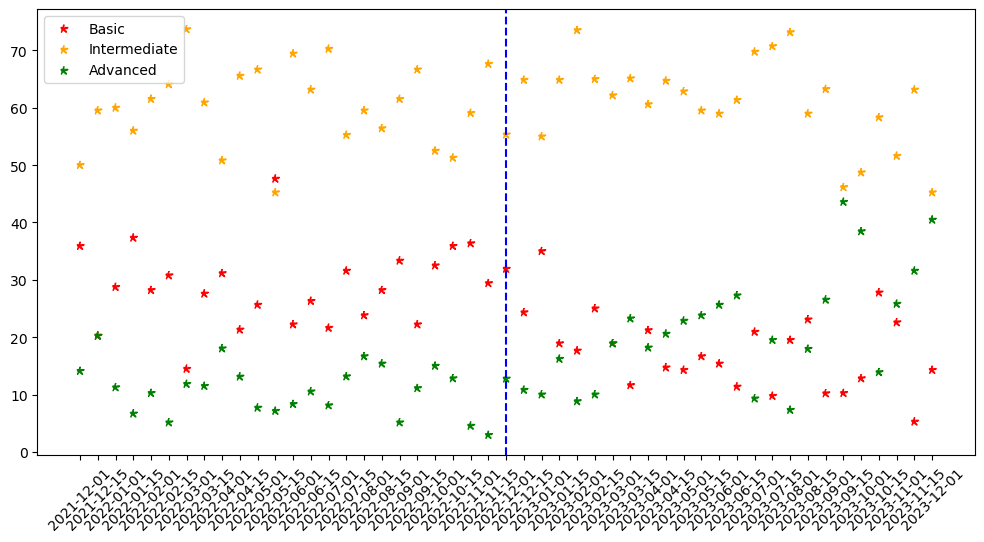

In [23]:
fig, ax = plt.subplots( figsize = (10, 5), sharey=True, sharex=True)

ax.scatter(m_chk_cnt_0.creationdate, m_chk_cnt_0.rate, # specify data
        color = 'red',
        label = 'Basic',
        marker='*',
        linestyle='--',
) 

ax.scatter(m_chk_cnt_1.creationdate, m_chk_cnt_1.rate, # specify data
        color = 'orange',
        label = 'Intermediate',
        marker='*',
        linestyle='--',
) 


ax.scatter(m_chk_cnt_2.creationdate, m_chk_cnt_2.rate, # specify data
        color = 'green',
        label = 'Advanced',
        marker='*',
        linestyle='--',
) 

ax.legend(loc = 'upper left', fontsize = 10) # add legend

ax.axvline(major_xticks[12], # add vertical line
           color = 'blue',
           linestyle = '--',
           linewidth = 1.5)


# ax.set_xticks(major_xticks)

plt.tight_layout()  
plt.xticks(rotation=45)
# plt.xscale('log');
plt.show();

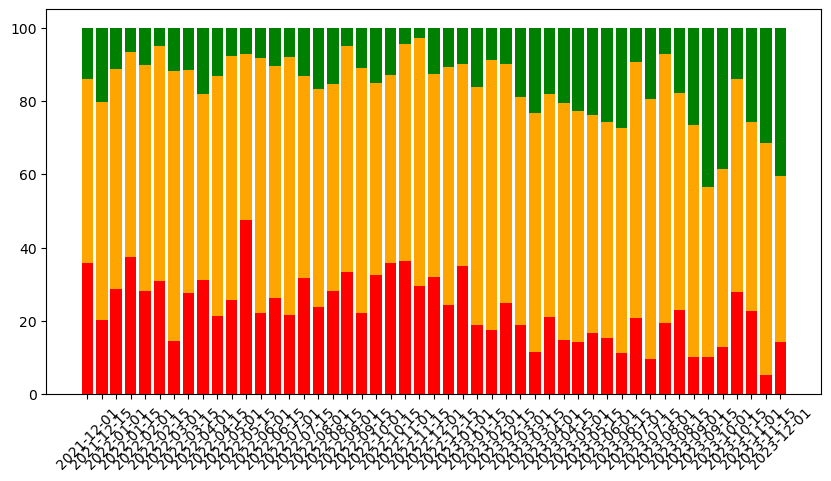

In [24]:
### Problem 2b: Reformat the data and generate the stacked bar plot above.


fig, ax = plt.subplots(figsize = (10, 5))

ax.bar(m_chk_cnt_0.creationdate,  m_chk_cnt_0.rate, color='red', label = 'Party A')
ax.bar(m_chk_cnt_1.creationdate,  m_chk_cnt_1.rate, bottom = m_chk_cnt_0.rate, color = 'orange', label = 'Party B')
ax.bar(m_chk_cnt_2.creationdate,  m_chk_cnt_2.rate, bottom = m_chk_cnt_0.rate + m_chk_cnt_1.rate, color = 'green', label = 'Party B')


plt.xticks(rotation = 45)
plt.show();